## Import Libraries

In [1]:
import matplotlib.pyplot as plt

## Create Dataset

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0, random_state=0)

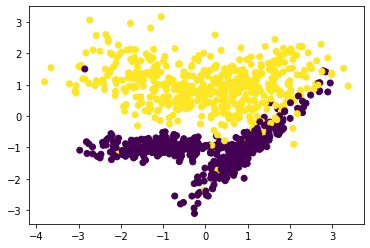

In [3]:
plt.scatter(X[:, 0],X[:, 1],c=y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Model 1

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [6]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


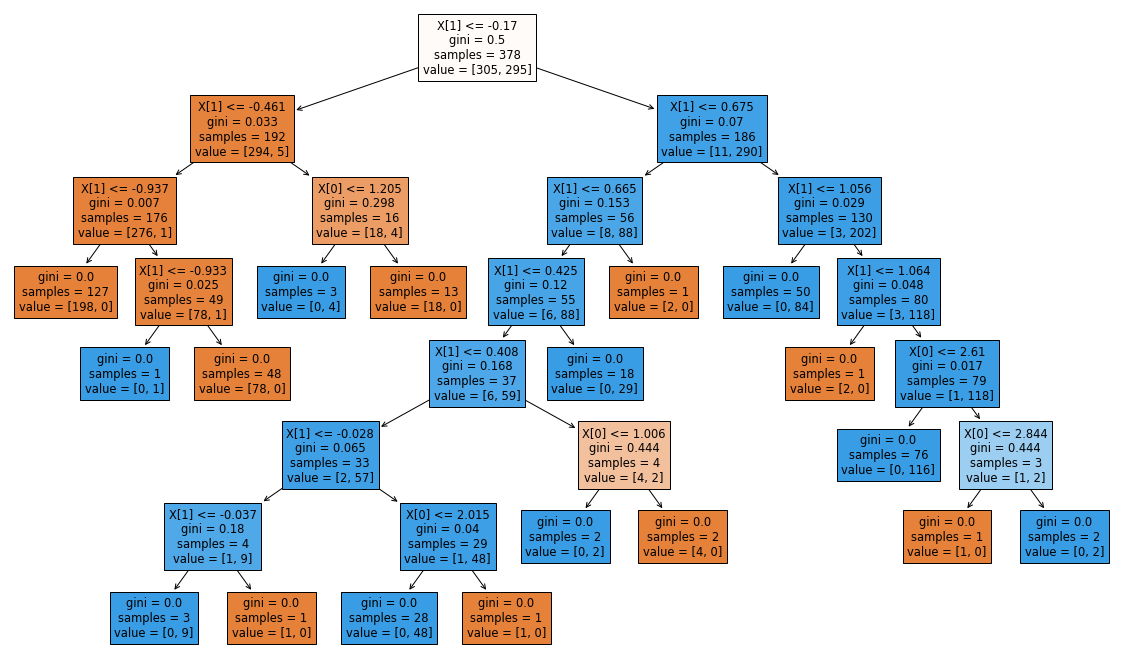

In [7]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(clf.estimators_[1],filled = True);

In [8]:
print(clf.predict([[0, 0]]))

[1]


In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn import metrics

In [11]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       196
           1       0.96      0.94      0.95       204

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



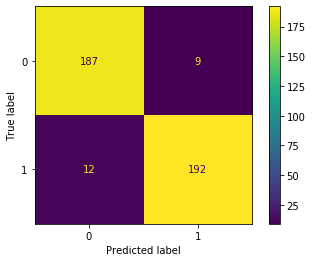

In [12]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

## Model 2 - n_estimators and bootstrap

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=40, max_depth=2, random_state=0,  bootstrap=False) #use the whole dataset
clf.fit(X_train, y_train)
# The larger the better, but also the longer it will take to compute. 
# In addition, note that results will stop getting significantly better beyond a critical number of trees.

In [ ]:
from sklearn import tree
tree.plot_tree(clf.estimators_[39],filled = True);

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

## Model 3 - bootstrap without max_samples

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'entropy', n_estimators=40, max_depth=2, random_state=0, bootstrap=True)
clf.fit(X_train, y_train)

In [ ]:
from sklearn import tree
tree.plot_tree(clf.estimators_[39],filled = True);

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

## Model 4 - bootstrap with max_samples

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'entropy', n_estimators=40, max_depth=2, random_state=0, bootstrap=True, max_samples=100)
clf.fit(X_train, y_train)

In [ ]:
from sklearn import tree
tree.plot_tree(clf.estimators_[1],filled = True);

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

## Model 5 - out-of-bag samples

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'entropy', n_estimators=40, max_depth=2, random_state=0, bootstrap=True, max_samples=100, oob_score=True)
clf.fit(X_train, y_train)
# out-of-bag validation do the validation of what is not included in the bag

In [ ]:
clf.oob_score_

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

# Pre-pruning

In [13]:
clf=RandomForestClassifier()

from sklearn.model_selection import GridSearchCV # Used to search for the best parameters

grid_param={"criterion":["gini","entropy"],
            "n_estimators":range(40,50),
             "max_depth":range(1,5,1)
            }

grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,n_jobs=-1) #n_jobs means the number of jobs in parallel (-1 = all processors)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'n_estimators': range(40, 50)})

In [14]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 40}


In [15]:
clf=RandomForestClassifier(n_estimators = 40,criterion='gini' ,max_depth=4 )
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=40)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       196
           1       0.95      0.94      0.94       204

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



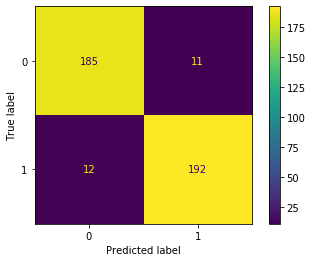

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
# Pre-pruning Second Method

In [19]:
from sklearn.metrics import accuracy_score

accuracy = []
for depth in range(1,20):
    clf=RandomForestClassifier(max_depth= depth)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
print(accuracy)

[0.93, 0.9325, 0.9325, 0.9375, 0.9375, 0.945, 0.9475, 0.945, 0.95, 0.95, 0.9475, 0.9475, 0.945, 0.9475, 0.945, 0.9475, 0.945, 0.95, 0.945]


# Post-pruning
## Based on cost complexity parameter ccp_alpha

In [20]:
clf=RandomForestClassifier(ccp_alpha=0.2)
clf.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.2)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       196
           1       0.94      0.93      0.93       204

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



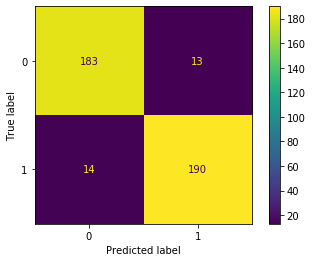

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()